# Intern Name: Himanshu Nirwan
# Task: Prediction House Prices with Linear Regression

In [117]:
import pandas as pd
import numpy as np

In [118]:
data = pd.read_csv('Housing.csv')

In [119]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [120]:
data.shape

(545, 13)

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [122]:
data.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [123]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [124]:
data['bedrooms'].value_counts()

3    300
2    136
4     95
5     10
6      2
1      2
Name: bedrooms, dtype: int64

In [125]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots
fig = make_subplots(rows=2, cols=3, subplot_titles=("Price", "Area", "Bedrooms", "Bathrooms", "Stories", "Parking"))

# Add horizontal box plots
fig.add_trace(go.Box(x=data['price'], orientation='h', name='Price'), row=1, col=1)
fig.add_trace(go.Box(x=data['area'], orientation='h', name='Area'), row=1, col=2)
fig.add_trace(go.Box(x=data['bedrooms'], orientation='h', name='Bedrooms'), row=1, col=3)
fig.add_trace(go.Box(x=data['bathrooms'], orientation='h', name='Bathrooms'), row=2, col=1)
fig.add_trace(go.Box(x=data['stories'], orientation='h', name='Stories'), row=2, col=2)
fig.add_trace(go.Box(x=data['parking'], orientation='h', name='Parking'), row=2, col=3)

# Update layout
fig.update_layout(title="Housing Features Box Plots", height=600, width=1000)

# Show plot
fig.show()

In [126]:
# Outlier Treatment
# Price and area have considerable outliers

In [127]:
# outlier treatment for price
Q1 = data.price.quantile(0.25)
Q3 = data.price.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
data = data[(data.price >= lower_limit) & (data.price <= upper_limit)]

In [128]:
# outlier treatment for area
Q1 = data.area.quantile(0.25)
Q3 = data.area.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
data = data[(data.area >= lower_limit) & (data.area <= upper_limit)]

In [129]:
# Outlier Analysis

fig = make_subplots(rows=2, cols=3, subplot_titles=("Price", "Area", "Bedrooms", "Bathrooms", "Stories", "Parking"))

fig.add_trace(go.Box(x=data['price'], orientation='h', name='Price'), row=1, col=1)
fig.add_trace(go.Box(x=data['area'], orientation='h', name='Area'), row=1, col=2)
fig.add_trace(go.Box(x=data['bedrooms'], orientation='h', name='Bedrooms'), row=1, col=3)
fig.add_trace(go.Box(x=data['bathrooms'], orientation='h', name='Bathrooms'), row=2, col=1)
fig.add_trace(go.Box(x=data['stories'], orientation='h', name='Stories'), row=2, col=2)
fig.add_trace(go.Box(x=data['parking'], orientation='h', name='Parking'), row=2, col=3)

fig.update_layout(title="Housing Features Box Plots", height=600, width=1000)

fig.show()

### Visualizing numerical variables

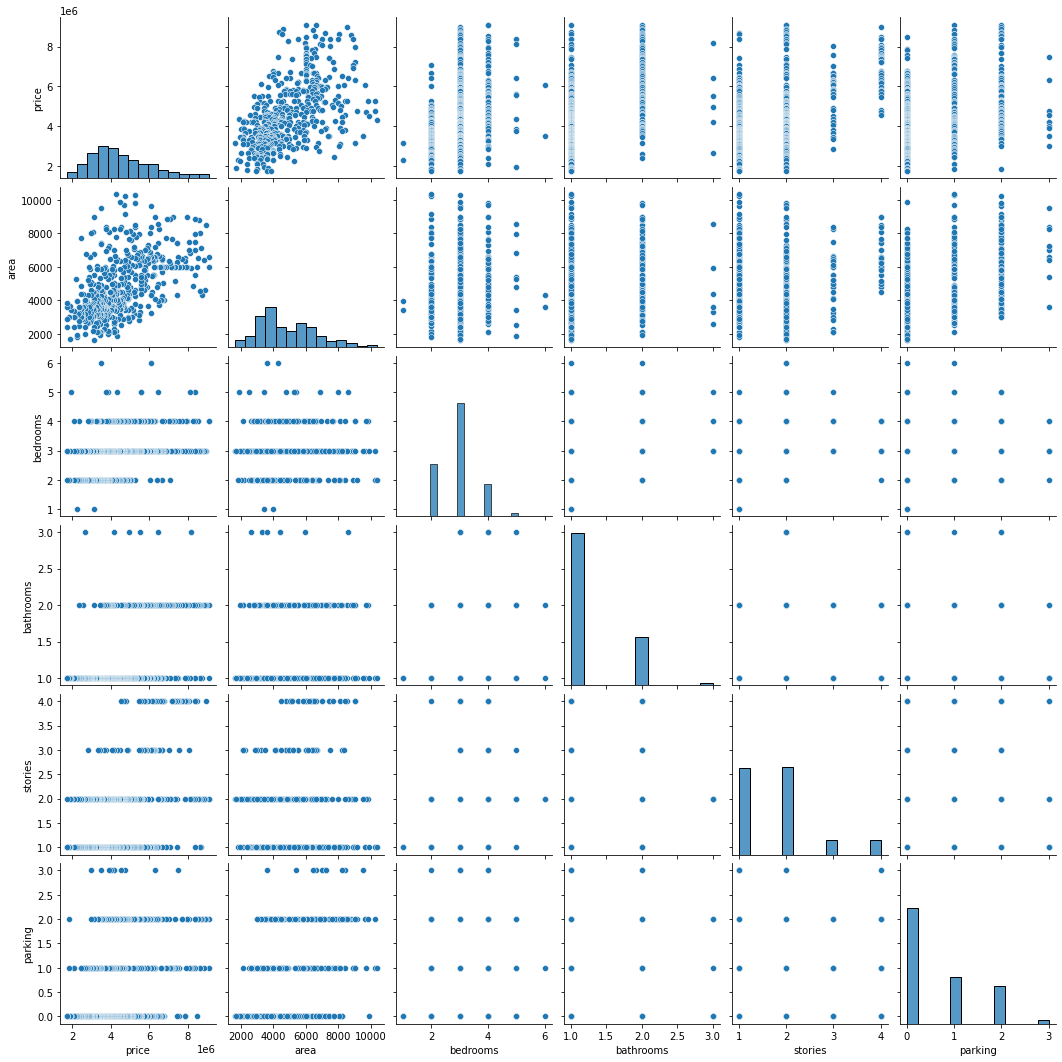

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig = sns.pairplot(data)
plt.show()

### Visualizing categorical variable

In [131]:
fig = make_subplots(rows=2, cols=3, subplot_titles=("Mainroad", "Guestroom", "Basement", "Hotwaterheating", "Airconditioning", "Furnishingstatus"))

fig.add_trace(go.Box(x=data['mainroad'], y=data['price'], name='Mainroad'), row=1, col=1)
fig.add_trace(go.Box(x=data['guestroom'], y=data['price'], name='Guestroom'), row=1, col=2)
fig.add_trace(go.Box(x=data['basement'], y=data['price'], name='Basement'), row=1, col=3)
fig.add_trace(go.Box(x=data['hotwaterheating'], y=data['price'], name='Hotwaterheating'), row=2, col=1)
fig.add_trace(go.Box(x=data['airconditioning'], y=data['price'], name='Airconditioning'), row=2, col=2)
fig.add_trace(go.Box(x=data['furnishingstatus'], y=data['price'], name='Furnishingstatus'), row=2, col=3)

fig.update_layout(title="Box Plots of Housing Features", height=800, width=1000)

fig.show()


### Data Preparation
- You can see that your dataset has many columns with values as 'Yes' or 'No'.

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [132]:
# List of variables to map
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Mapping 'yes' to 1 and 'no' to 0 for binary variables
data[varlist] = data[varlist].apply(lambda x: x.map({'yes': 1, 'no': 0}))


In [133]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


In [134]:
# Get the dummy variables for the feature 'furnishingstatus' 
fstatus = pd.get_dummies(data['furnishingstatus'])

In [135]:
fstatus.head()

,furnished,semi-furnished,unfurnished
15,0,1,0
16,0,0,1
17,1,0,0
18,1,0,0
19,0,1,0


In [136]:
# Let's drop the first column from status df using 'drop_first = True'

fstatus = pd.get_dummies(data['furnishingstatus'], drop_first = True)



In [137]:
# Adding the results to the original dataframe

data = pd.concat([data, fstatus], axis = 1)

In [138]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,1,0


In [139]:
# Drop 'furnishingstatus' as we have created the dummies for it

data.drop(['furnishingstatus'], axis = 1, inplace = True)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0


### Model Building

In [150]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [141]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

data[num_vars] = scaler.fit_transform(data[num_vars])

In [142]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,1.000000,0.499426,0.6,0.0,0.333333,1,0,1,0,0,0.666667,0,1,0
16,1.000000,0.568312,0.6,0.5,0.333333,1,1,1,0,1,0.333333,1,0,1
17,0.980952,0.786452,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
18,0.971429,0.338691,0.4,0.5,0.333333,1,1,0,0,1,0.666667,0,0,0
19,0.966667,0.547646,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0


In [143]:
x = data.drop(columns=['price'])
y = data['price']

In [144]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7, test_size=0.3, random_state=40)

In [145]:
print(x_train.shape)
print(y_train.shape)

(361, 13)
(361,)


### Implementing Linear Regression

In [146]:
lr = LinearRegression()

In [147]:
lr.fit(x_train,y_train)

LinearRegression()

In [148]:
lr_predict = lr.predict(x_test)

In [149]:
r2_score(y_test,lr_predict)

0.651767604628519